# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** XXXX

**Author 1 (sciper):** XXXX (XXXXXX)  
**Author 2 (sciper):** XXXX (XXXXXX)   
**Author 3 (sciper):** XXXX (XXXXXX)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

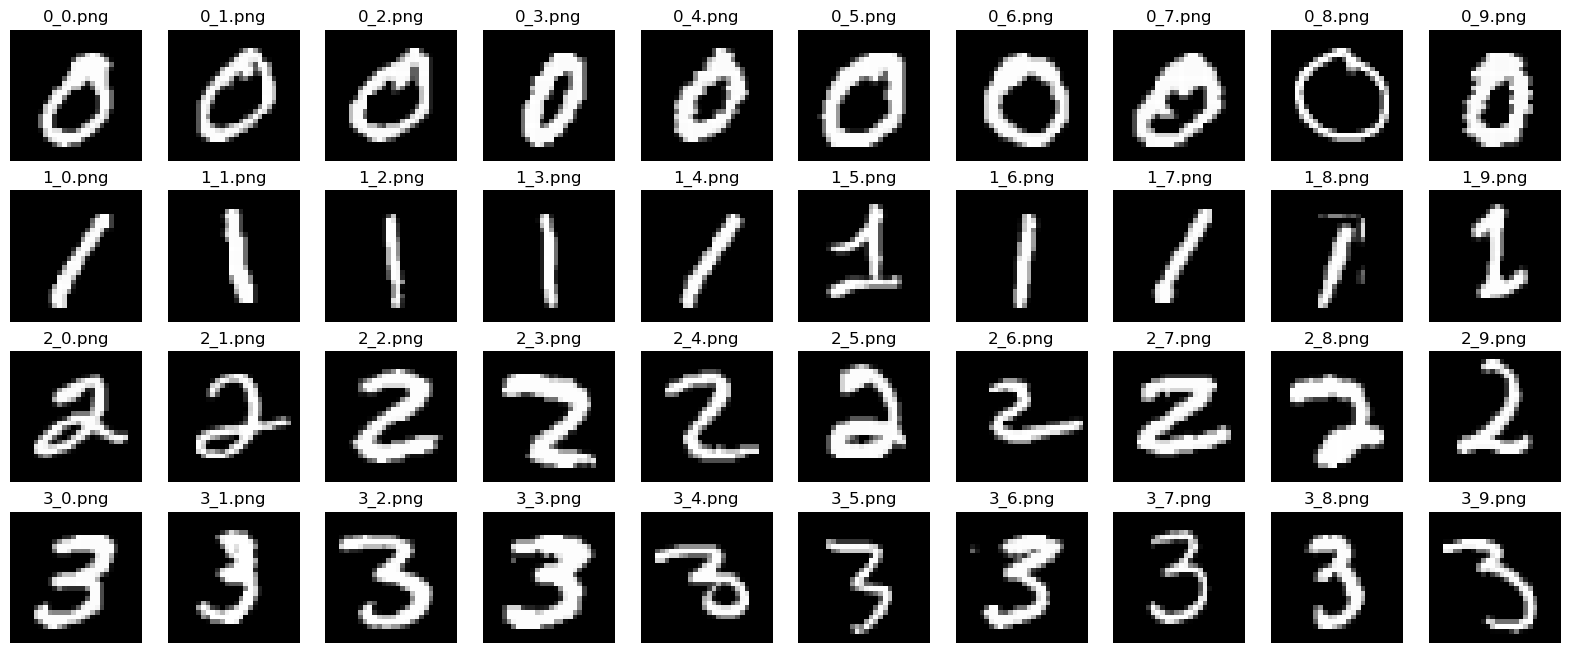

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

<class 'numpy.ndarray'>
(10, 28, 28)


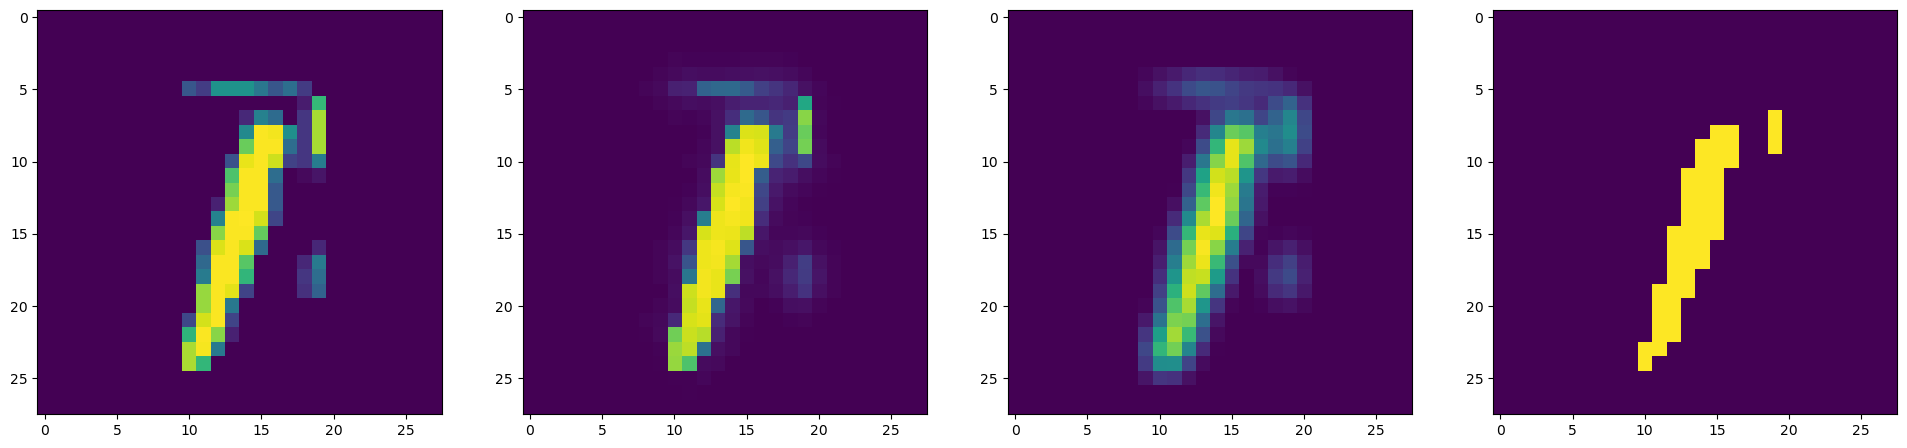

In [3]:
#PREPROCESSING TRIAL

# TODO
import cv2
import numpy as np 

print(type(zeros_im))
print(zeros_im.shape)

#gray = cv2.cvtColor(zeros_im[0], cv2.COLOR_BGR2GRAY)
bilateral = cv2.bilateralFilter(ones_im[8],5,75,75)
gauss = cv2.GaussianBlur(ones_im[8], (3,3), 0)
threshold_value = 180
max_value = 255
threshold_type = cv2.THRESH_BINARY
_, thresholded_img = cv2.threshold(ones_im[8], threshold_value, max_value, threshold_type)

fig, axs = plt.subplots(1,4,figsize=(24,12))
axs[0].imshow(ones_im[8])
axs[1].imshow(bilateral)
axs[2].imshow(gauss)
axs[3].imshow(thresholded_img)

### Test with remaining noise 

Here we tried different image processing method to see how it looks like. We can see that the thresholded image is the best looking. But as you can see some noise is still there and might cause some problems later. 

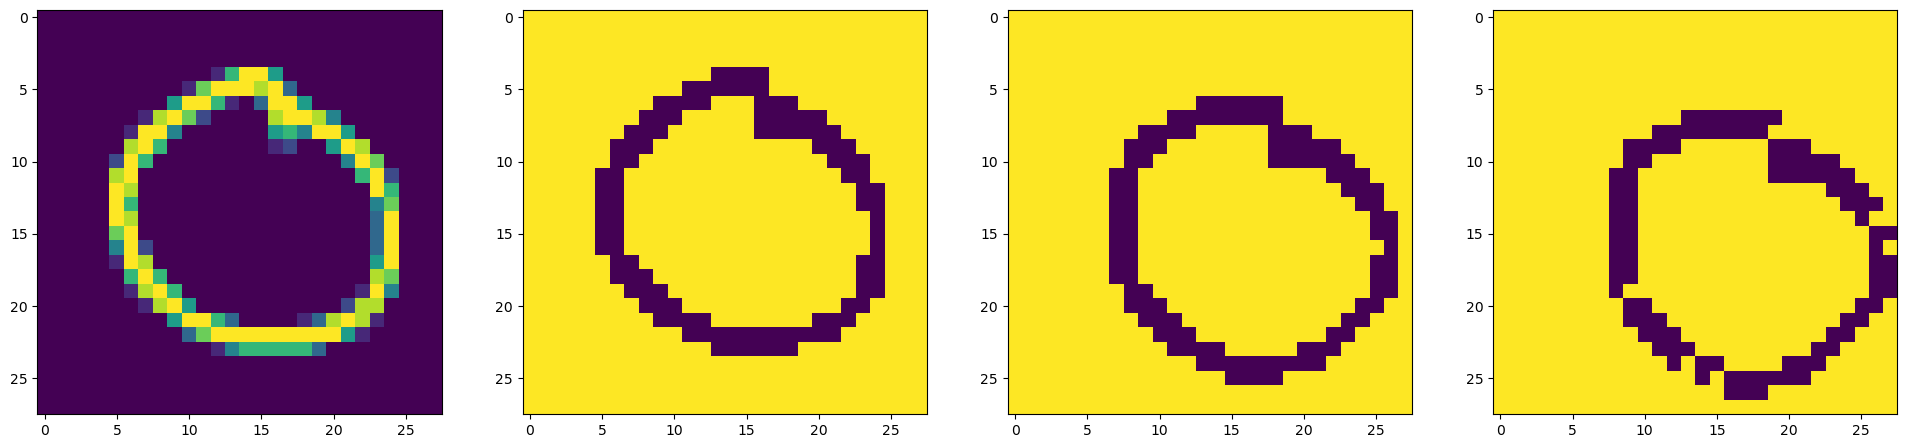

In [4]:
#PREPROCESSING TRIAL


# Apply binary thresholding to separate the foreground from the background
thresh = cv2.threshold(zeros_im[8], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply morphological opening to remove small noise and smooth the edges
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
# Apply morphological closing to fill in small holes and gaps within the foreground
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

fig, axs = plt.subplots(1,4,figsize=(24,12))
axs[0].imshow(zeros_im[8])
axs[1].imshow(thresh)
axs[2].imshow(opening)
axs[3].imshow(closing)

### Test with pixels don't touching eachother 

Here we used this test to illustrate the problem when 2 pixels are only touching at their corners. This situation caused problem while finding the contours, so we had to fix it in the next try. 

In [5]:
from skimage import morphology

def preprocess(image):

    # Apply thresholding to obtain a binary image
    thresh = skimage.filters.threshold_otsu(image)
    binary = image < thresh
    
    # Apply dilation to connect adjacent pixels
    dilated = morphology.binary_dilation(binary, footprint=morphology.square(2))
    # Apply erosion to remove noise
    eroded = morphology.binary_erosion(dilated, footprint=morphology.square(4))

    return eroded

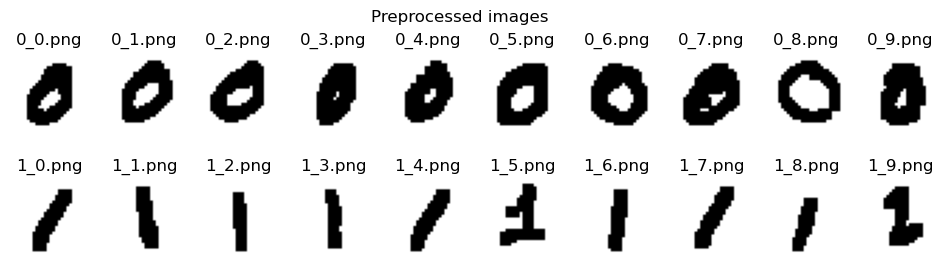

In [6]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = [preprocess(im) for im in zeros_im]
ones = [preprocess(im) for im in ones_im]

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

For the preprocessing of the numbers, the most important part for us was to be able to get the best contour possible, for the "0",  only the outer contour will be important that's why we didn't care about the inside of the number. 
After many tries we decided to use the library skimage which gave use the best result. The idea was to get a binary image of the numbers.
Then we realized that some of the numbers had pixels touching each other on their corners and thus our contour function was not working properly. That's why we decided to use morphological operations to get rid of this problem and of any remaining noise (for example in picture 1_8). 
To do so we just dilated and then eroded the pictures to make them as clean as possible.

### 1.2. Get descriptors (4 pts)

In [7]:
import numpy as np
from skimage import filters, measure
from scipy import interpolate
from scipy import fft

#This function returns a list with the contours of all images in "img"
def get_contours(img, N):
    contour_list = []
    
    #Get the contour of each image
    for im in img:
        contours = measure.find_contours(im, 0.5)
        contour = contours[0]
        
        #Interpolate the contour
        tck, u = interpolate.splprep(contour.T, s=0)
        u_new = np.linspace(u.min(), u.max(), N)
        x_new, y_new = interpolate.splev(u_new, tck)
        new_contour = np.column_stack((x_new, y_new))
        
        #Take N equi-distant points from the contour
        contour_resampled = np.zeros((N, 2))
        for i in range(N):
            idx = int(i*len(new_contour) / N)
            contour_resampled[i, :] = new_contour[idx, :]
        contour_list.append(contour_resampled)
        
    return contour_list

#This function returns a list with the descriptors of each images in "img"
def get_descriptors(img, N):
    descriptors = []
    contour_list = get_contours(img, N)
    
    # Compute Fourier descriptors for each contour
    for contour in contour_list:
        z = contour[:, 0] + 1j * contour[:, 1]  #We want them in complex form
        Z = fft.fft(z)   #Compute the Fourier transform 
        descriptors.append(Z) 
    
    return descriptors

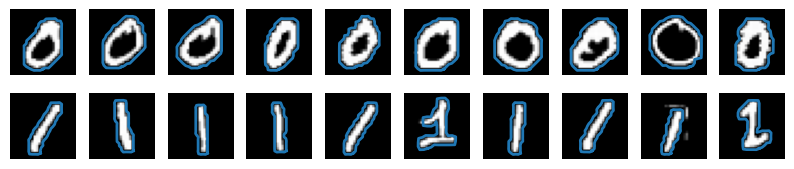

In [8]:
N = 50 #Increase here to have a smoother contour

contour_list_zeros = get_contours(zeros, N)
contour_list_ones = get_contours(ones, N)


fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 2))
for i in range(10):
    axes[0][i].imshow(zeros_im[i], cmap='gray')
    axes[0][i].plot(contour_list_zeros[i][:,1], contour_list_zeros[i][:,0], linewidth=2)
    axes[0][i].axis('off')
    axes[1][i].imshow(ones_im[i], cmap='gray')
    axes[1][i].plot(contour_list_ones[i][:,1], contour_list_ones[i][:,0], linewidth=2)
    axes[1][i].axis('off')
plt.show()

In [9]:
#Store the descriptors for zeros and ones
descriptors_zeros = get_descriptors(zeros, N)
descriptors_ones = get_descriptors(ones, N)

#Print of the ten first descriptors of the image 0_0.png
print(descriptors_zeros[0][:10])


[ 7.47464358e+02+6.99735815e+02j  4.70937985e+02+5.39969777e+01j
  4.78958762e-01-2.76032297e+00j  1.21655354e+00+2.26381483e+01j
 -8.73677870e+00-1.19580070e+01j -7.16971713e+00+3.88505022e+00j
 -3.04348484e+00-1.24743646e+00j  9.43773949e-01-4.06149150e+00j
 -9.75975136e-01-1.14816287e-01j -8.50066699e-01-2.00249213e+00j]


#### Discussion

To get the descriptors we first wanted to get the contours of each preprocessed images, here we can simply use the function find_contours from skimage. Then we wanted to keep only N equidistant points of the contours. After a few tries with different values for N we decided to keep N=50 which was the minimal value to keep something satisfying with a smooth enough contour. But we could also inscrease N to get a more beautiful and smooth contour.
We started by making the interpolation using scipy and then we took the N equi-distant points to resample the contour. 

Once this was done we were able to easily get the descriptors by converting the contours into complex form and then use the Fourier Transform on them. 

As you can see on the plots, our contour are pretty much satisfying and follow the original shape of the different images, for the "0" we kept only the outer contour, because it was not making sense at all to keep the inner one because we can recontruct a zero only from the outer contour. Also, as we focused only on having a clean outer contour while preprocessing, the inner contour is mostly bad on the images and wouldn't give us clean information on the shape of the number. 

For the descriptors, we plotted the first ten descriptors of an image and we'll see later on the reconstruction if they are satisfying or not.

### 1.3. Study effect of descriptors (6 pts)

In [10]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 5, 10, 15, 20]

In [11]:
#This function returns a reconstructed contour from the descriptors passed in argument.
def reconstruct_contour(descriptors, num_descriptors):
    
    #we first copy the descriptors 
    Z = np.copy(descriptors)
    
    #All unused frequencies are set to 0 
    num_coeffs = len(Z)
    freqs = fft.fftfreq(num_coeffs)
    idx = np.argsort(np.abs(freqs))
    Z[idx[num_descriptors+1:-num_descriptors]] = 0
    
    #Use inverse Fourier transform
    z = fft.ifft(Z)
    
    #Here we had to play with the order and sign og z.imag and z.real to make the plot side up
    contour_reconstructed = np.column_stack((z.imag, -z.real))
    
    #To avoid open contours, we finish the reconstructed contour with his first value 
    contour_reconstructed = np.vstack((contour_reconstructed, contour_reconstructed[0]))
    
    return contour_reconstructed


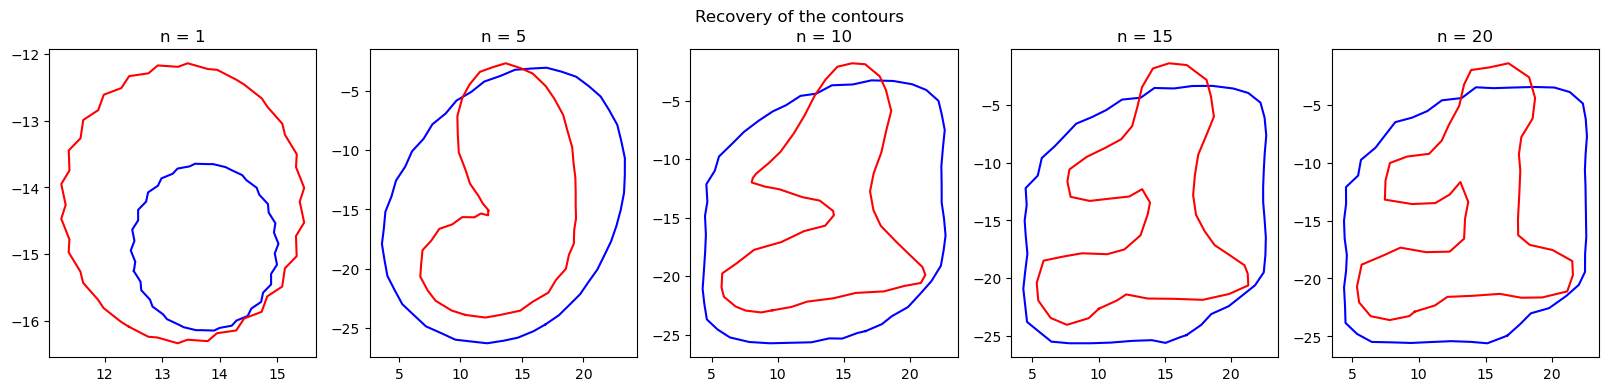

In [12]:

# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    n = descr_set_sizes[i]
    reconstructed_contour = reconstruct_contour(descriptors_zeros[5], n)
    axes[i].plot(reconstructed_contour[:, 0], reconstructed_contour[:, 1], color='blue')
    axes[i].set_title(f"n = {n}")

# Plot recovery for a one image
for i in range(5):
    n = descr_set_sizes[i]
    reconstructed_contour = reconstruct_contour(descriptors_ones[5], n)
    axes[i].plot(reconstructed_contour[:, 0], reconstructed_contour[:, 1], color='red')
    axes[i].set_title(f"n = {n}")

fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

You can find here the result of the reconstruction of the image 0_0.png and 1_5.png, for this part we tried to play with the number of descriptors to keep to see what could be the minimal value which gives good results for each image. 
After a few tries we decided to keep n = [1, 5, 10, 15, 20] for the plots. 
On these plots you can see that we start to have something good between n = 10 and n = 15.
We can also see that it is easier to get a good looking shape for the reconstruction of zeros than for certain type of one, this is logic and is due to the more complex shape of te "1". 

To reconstruct the images we first decided the number of descriptors to take into account, then depending on this number we kept that much of paired frequencies. For example if we have freq = [0, 1, 2, 3, -2, -1] and we want to keep n = 2. Then we took the freq = 0, 1, -1, 2. To achieve that we used the function fftfreq. 

The descriptors corresponding to all other frequencies than that were then set to 0. Finally, we used the inverse fourier transform to reconstruct the contour in complex form and we stored the real and imaginary parts using column_stack to make the format compatible with the plots. 

### 1.4 Clustering (2 pts)

In [13]:
num_descriptors = 10

def get_features(descriptor_list, num_descriptors):
    
    features1 = []
    features2 = []
    
    for descriptors in descriptor_list:
        #Take the positive frequencies
        pos_freqs = np.fft.fftfreq(len(descriptors))[1:num_descriptors+1]
        pos_descriptors = descriptors[1:num_descriptors+1]

        #Get the features
        f1 = np.abs(pos_descriptors[0])
        f2 = np.abs(pos_descriptors[1])

        features1.append(f1)
        features2.append(f1)
        
    return features1, features2

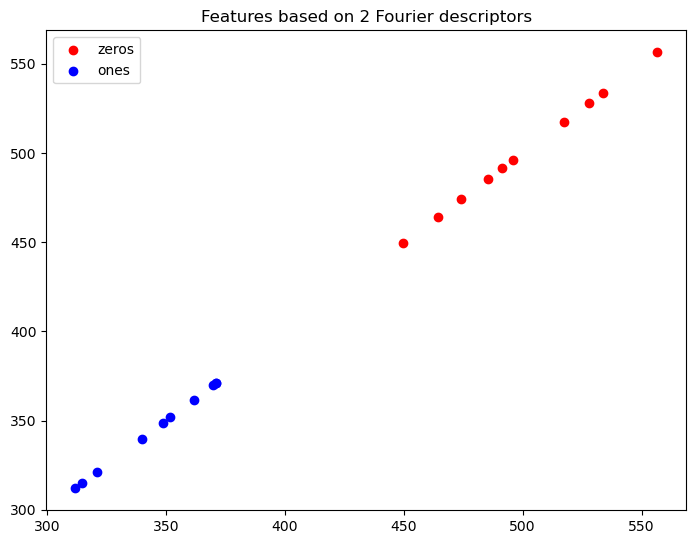

In [14]:
zeros_f1 = [get_features(descriptors_zeros, num_descriptors)[0]]
zeros_f2 = [get_features(descriptors_zeros, num_descriptors)[1]]
ones_f1 = [get_features(descriptors_ones, num_descriptors)[0]]
ones_f2 = [get_features(descriptors_ones, num_descriptors)[1]]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


We can see that the clusters are well separate.
Each of the zeros contours are pretty similar, it is then normal to get these clusters. 
Although we have a separation between the datas, we are not completely sure about the way we got them and maybe another method to get the features could lead in better clusters. 
Currently it looks like the number of descriptors choosed have no influence on the resulting clusters. 

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

ranslation, rotation, and scale affect the Fourier descriptors differently. Translation only affects the phase of the descriptors, while rotation affects both magnitude and phase, and scale affects only magnitude. To make the descriptors invariant to these transformations, we need to apply specific operations to the descriptor arrays.

For translation, we subtract the first descriptor from all other descriptors, leaving the first descriptor unchanged. For rotation, we convert the descriptors to polar coordinates and subtract the phase of the first descriptor from all other phases. For scale, we divide all descriptors by the magnitude of the first descriptor.

To make the Fourier descriptors invariant to all transformations, we apply the three operations in order: first subtract the first descriptor, then convert to polar coordinates and subtract the phase of the first descriptor, and finally divide by the magnitude of the first descriptor. 

#### Implementation

In [15]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    
    preprocessed = []
    
    for im in img: 
        preprocessed.append(preprocess(im))
    
    descriptors = get_descriptors(preprocessed, 50)
    
    invariant_descriptors = []
    
    for descriptor in descriptors:
        if inv_to_translation:
            descriptor[1:] -= descriptor[0]

        if inv_to_rotation:
            # Convert to polar coordinate to make a change on the phase
            magnitudes, phases = np.abs(descriptor), np.angle(descriptor)
            phases[1:] -= phases[0]

            # Convert back to Cartesian coordinates
            descriptor = magnitudes * np.exp(1j * phases)

        if inv_to_scale:
            descriptor /= np.abs(descriptor[0])

        invariant_descriptors.append(descriptor)
    
    invariant_features = get_features(invariant_descriptors, 10)
        
    return invariant_features

In [16]:
import random
import numpy as np
from scipy.ndimage import affine_transform

# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    
    angle_range = (-10,10)
    
    angle = np.deg2rad(random.uniform(angle_range[0], angle_range[1]))
    rotated = skimage.transform.rotate(img, angle)
    
    return rotated

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img):
    
    translate_range = (-5,5)
    
    translation = np.array([random.uniform(translate_range[0], translate_range[1])
                            , random.uniform(translate_range[0], translate_range[1])])
    
    translated_image = np.roll(img, int(translation[1]), axis=0)
    translated_image = np.roll(translated_image, int(translation[0]), axis=1)
    return translated_image
        
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img):
    
    scale_range = (0.8, 1.5)
    
    scale = random.uniform(scale_range[0], scale_range[1])
    rescaled = skimage.transform.rescale(img, scale, mode='reflect')

    return rescaled

def full_transformation(img):
    
    rotated = random_rotate(img)
    translated = random_translate(rotated)
    scaled = random_scale(translated)
    
    return scaled

In [17]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = []
rotated_images_ones = []

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = []
translated_images_ones = []

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = []
scaled_images_ones = []

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = []
transformed_images_ones = []

for zero in zeros_im:
    rotated_images_zeros.append(random_rotate(zero))
    translated_images_zeros.append(random_translate(zero))
    scaled_images_zeros.append(random_scale(zero))
    transformed_images_zeros.append(full_transformation(zero))
for one in ones_im:
    rotated_images_ones.append(random_rotate(one))
    translated_images_ones.append(random_translate(one))
    scaled_images_ones.append(random_scale(one))
    transformed_images_ones.append(full_transformation(one))

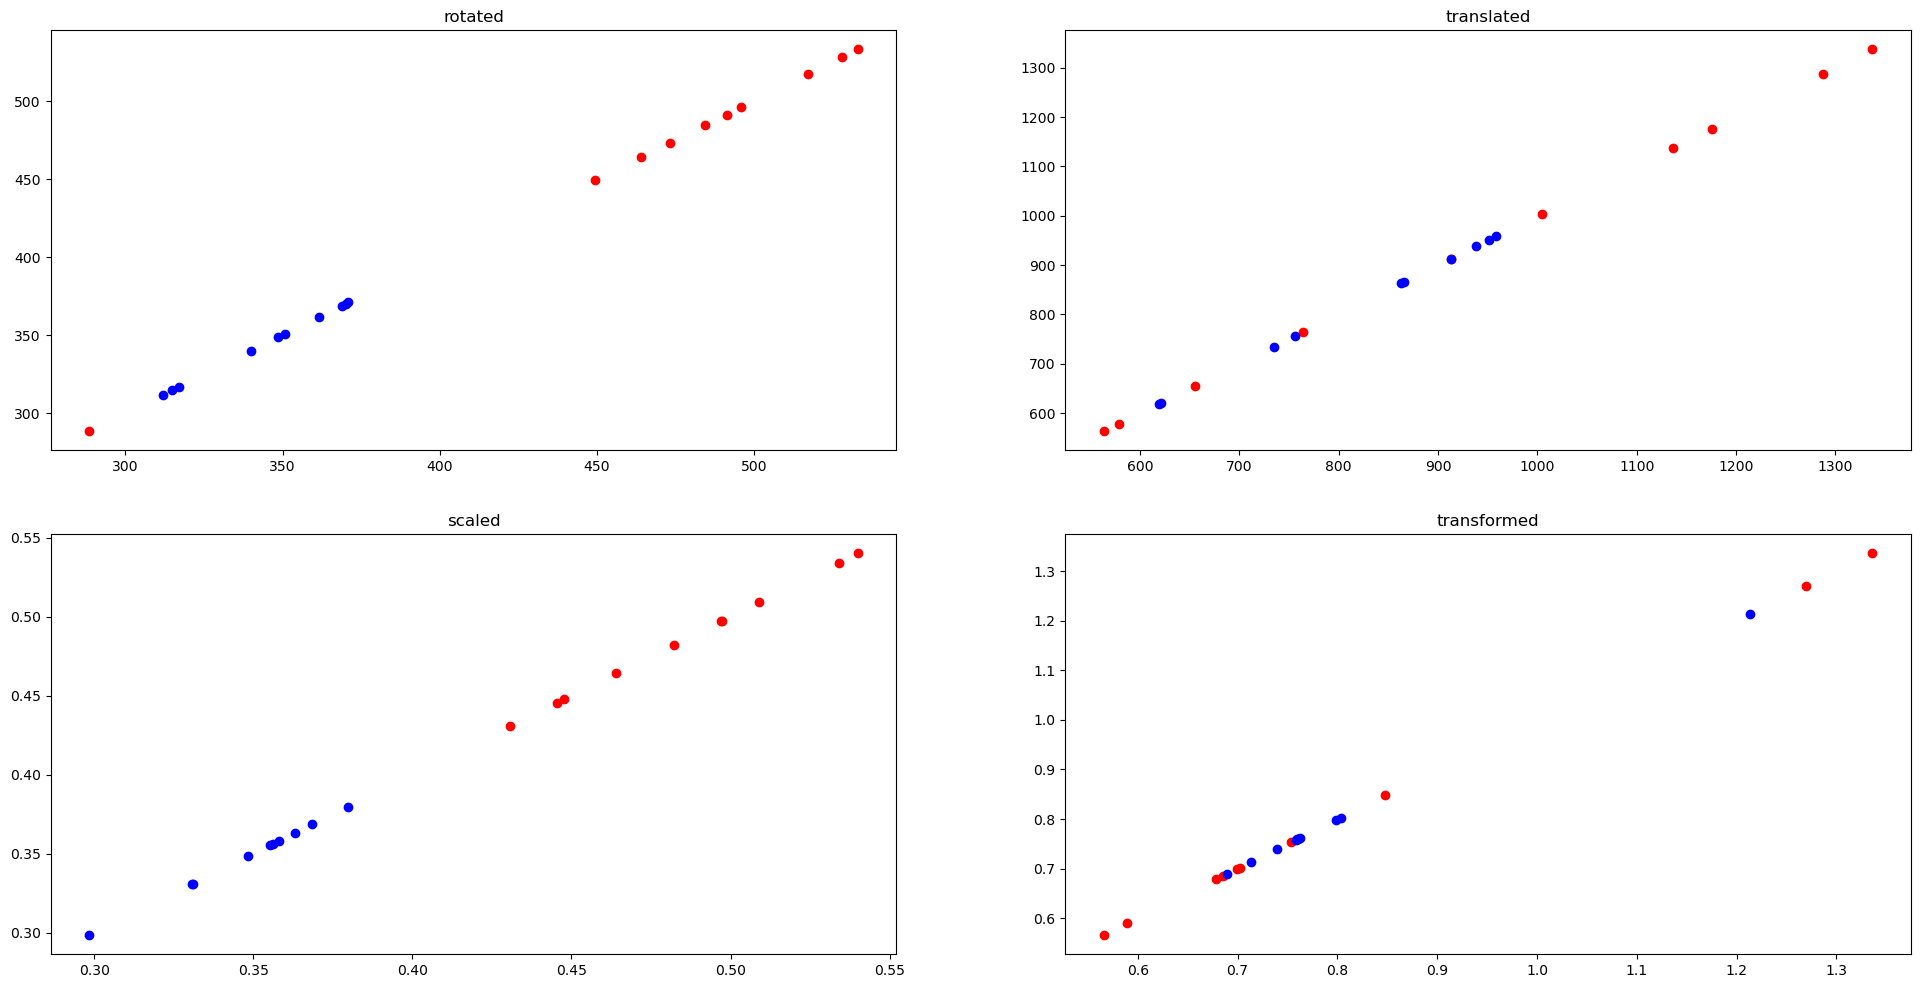

In [18]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!

features0_rotated = get_invariant_features(rotated_images_zeros, inv_to_rotation=True
                                           , inv_to_translation=False, inv_to_scale=False)
features1_rotated = get_invariant_features(rotated_images_ones, inv_to_rotation=True
                                           , inv_to_translation=False, inv_to_scale=False)

features0_translated = get_invariant_features(translated_images_zeros, inv_to_rotation=False
                                           , inv_to_translation=True, inv_to_scale=False)
features1_translated = get_invariant_features(translated_images_ones, inv_to_rotation=False
                                           , inv_to_translation=True, inv_to_scale=False)

features0_scaled = get_invariant_features(scaled_images_zeros, inv_to_rotation=False
                                           , inv_to_translation=False, inv_to_scale=True)
features1_scaled = get_invariant_features(scaled_images_ones, inv_to_rotation=False
                                           , inv_to_translation=False, inv_to_scale=True)

features0_transformed = get_invariant_features(transformed_images_zeros, inv_to_rotation=True
                                           , inv_to_translation=True, inv_to_scale=True)
features1_transformed = get_invariant_features(transformed_images_ones, inv_to_rotation=True
                                           , inv_to_translation=True, inv_to_scale=True)


# Plot features for all images
fig, axs = plt.subplots(2,2, figsize=(24,12))

axs[0][0].scatter(features0_rotated[0], features0_rotated[1], color='r', label='zeros')
axs[0][0].scatter(features1_rotated[0], features1_rotated[1], color='b', label='ones')
axs[0][0].set_title("rotated")

axs[0][1].scatter(features0_translated[0], features0_translated[1], color='r', label='zeros')
axs[0][1].scatter(features1_translated[0], features1_translated[1], color='b', label='ones')
axs[0][1].set_title("translated")

axs[1][0].scatter(features0_scaled[0], features0_scaled[1], color='r', label='zeros')
axs[1][0].scatter(features1_scaled[0], features1_scaled[1], color='b', label='ones')
axs[1][0].set_title("scaled")

axs[1][1].scatter(features0_transformed[0], features0_transformed[1], color='r', label='zeros')
axs[1][1].scatter(features1_transformed[0], features1_transformed[1], color='b', label='ones')
axs[1][1].set_title("transformed")


plt.show()


#### Discussion

Here you can find the clusters formed after applying different transformations on the images. 
We get pretty decent results when we do rotate or scale the images, with the images well separate (except from one outlier on the rotated image). 
But we get pretty bad results when we try to apply translation and full transformation. We believe that this is due to a wrong translation function. We tried a few things to fix it but it was unfortunately not working. 
We also believe that this could happen due to the preprocessing that could be unsuitable for this case, or to the image being translated outside of the range.

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

In [19]:
def preprocess2(image):

    # Apply thresholding to obtain a binary image
    thresh = skimage.filters.threshold_otsu(image)
    binary = image < thresh
    
    # Apply dilation to connect adjacent pixels
    dilated = morphology.binary_dilation(binary, footprint=morphology.square(2))
    # Apply erosion to remove noise
    eroded = morphology.binary_erosion(dilated, footprint=morphology.square(3))

    return eroded

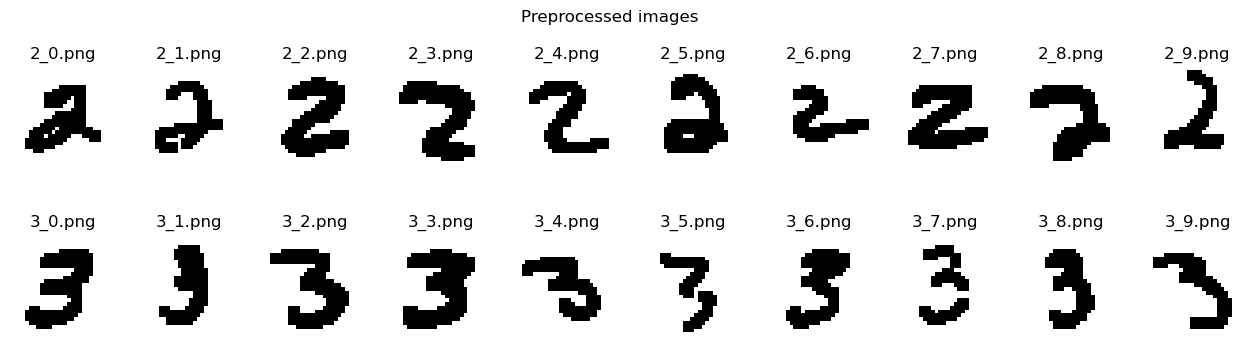

In [20]:
twos = [preprocess2(im) for im in twos_im]
threes = [preprocess2(im) for im in threes_im]

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(16, 4))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [21]:
import cv2

from skimage.measure import find_contours
from skimage import measure
from sklearn.cluster import KMeans
from scipy import ndimage
from math import sqrt

def perimeter(img):
    n4 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]) # neighborhood of 4 pixels
    non_digit = img.astype(np.uint8) - ndimage.binary_erosion(img, n4) 
    conv_weight = np.array(np.array([[10, 2, 10], [2, 1,  2],[10, 2, 10]]))
    conv_img = ndimage.convolve(non_digit, conv_weight, mode = 'constant')
    weights_dict = {5:1, 7:1, 13:(1+sqrt(2))/2, 15:1, 17:1,  23:(1+sqrt(2))/2, 21:sqrt(2), 25:1, 27:1, 33:sqrt(2)}
    weights = np.array([weights_dict.get(n, 0) for n in range(45)])

    return weights[conv_img].sum() # number of pixels in the region's perimeter

def area(img):
    return img.sum() * np.product(np.full(2, 1))

# Calculate the compactness feature
    compactness = (perimeter ** 2) / area

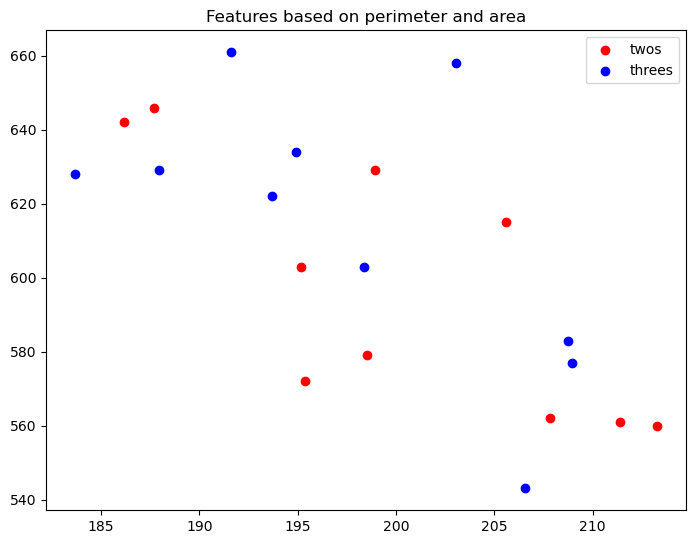

In [22]:
# Calculate perimeter and area for each image
twos_f1 = [perimeter(img) for img in twos]
twos_f2 = [area(img) for img in twos]
threes_f1 = [perimeter(img) for img in threes]
threes_f2 = [area(img) for img in threes]


# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

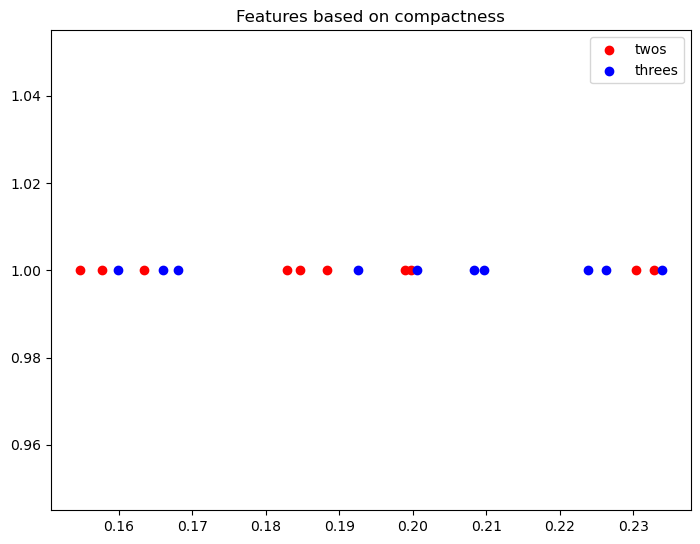

In [23]:
# Make the 1D plot of the compacity
# ratio of the area of an object to the area of a circle with the same perimeter
twos_compactness = 4 * np.pi * np.array(twos_f2) / np.array(twos_f1)**2
threes_compactness = 4 * np.pi * np.array(threes_f2) / np.array(threes_f1)**2

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_compactness, np.ones_like(twos_compactness), color='r', label='twos')
ax.scatter(threes_compactness, np.ones_like(threes_compactness), color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on compactness")
plt.show()

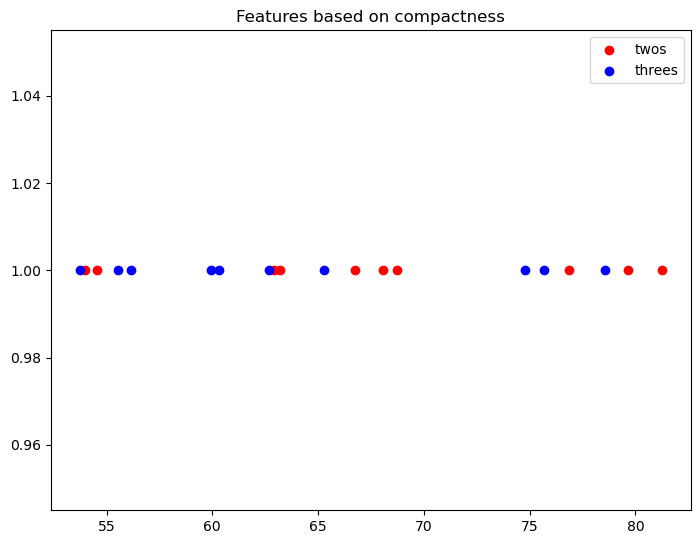

In [24]:
# perimeter^2 / area
twos_compactness = np.array(twos_f1)**2 / np.array(twos_f2)
threes_compactness = np.array(threes_f1)**2 / np.array(threes_f2)

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_compactness, np.ones_like(twos_compactness), color='r', label='twos')
ax.scatter(threes_compactness, np.ones_like(threes_compactness), color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on compactness")
plt.show()

####  Discussion

The 1D plot does not offer a clear separation between the twos and the threes for us to find 2 well-defined regions. This is, as a first glance, quite intuitive as "2"'s and "3"'s don't seem to differ that much in terms of perimeter and area.

Added to the fact that the area of a shape is weighted by a circle of similar (to a certain extent) perimeter when computing the compacity feature, we obtain values in a similar numerical bracket [50-80] for both classes. This would not have been the case, in our opinion, when it would come to compare "2"'s and "1"'s or "3"'s and "1"'s, as the difference in perimeter and area between theses numbers is greated than the one between "2"'s and "3"'s.

We also know that depending on the definition of the area and perimeter of our digits, the compactness can be very different. We assume that by using other libraries, and other 'from scratch' definitions for perimeter and area (as the examples seen in the course), we could achieve other (potentially better) results.

### 2.2. Additional method (4 pts)

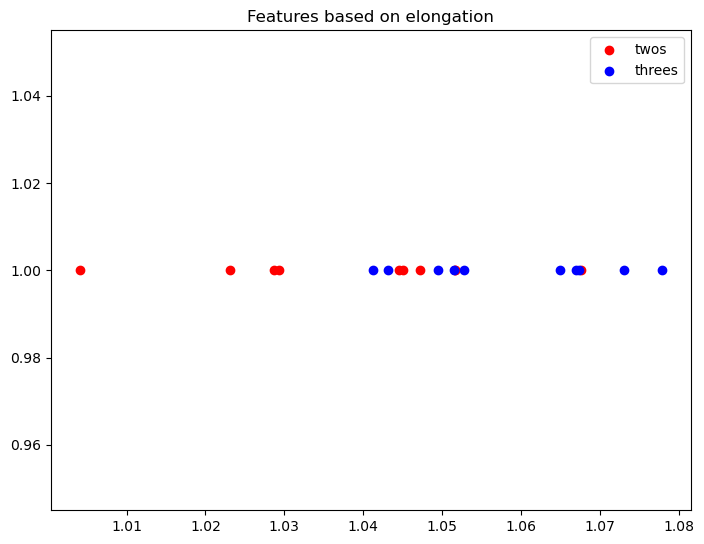

In [25]:
from skimage.measure import label, regionprops

twos_region = [regionprops(label(img)) for img in twos]
twos_elongation = [(region[0].major_axis_length / region[0].minor_axis_length) for region in twos_region]
twos_nbeuler = [region[0].moments[0][0] for region in twos_region]

threes_region = [regionprops(label(img)) for img in threes]
threes_elongation = [(region[0].major_axis_length / region[0].minor_axis_length) for region in threes_region]
threes_nbeuler = [region[0].moments[0][0] for region in threes_region]

# Plot features for all images

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_elongation, np.ones_like(twos_nbeuler), color='r', label='twos')
ax.scatter(threes_elongation, np.ones_like(twos_nbeuler), color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on elongation")
plt.show()

This gives use a good insight about the elongation feature. The separation between both classes is better than the one computed using compactness, but has some 'outliers'. We decided to implement a second feature to make the separation between the "2"'s and the "3"'s clearer. By reading a bit of the regionprops document, we found a feature that could be interesting to study : the extent, defined as the ratio of pixels in the region to pixels in the total bounding box.

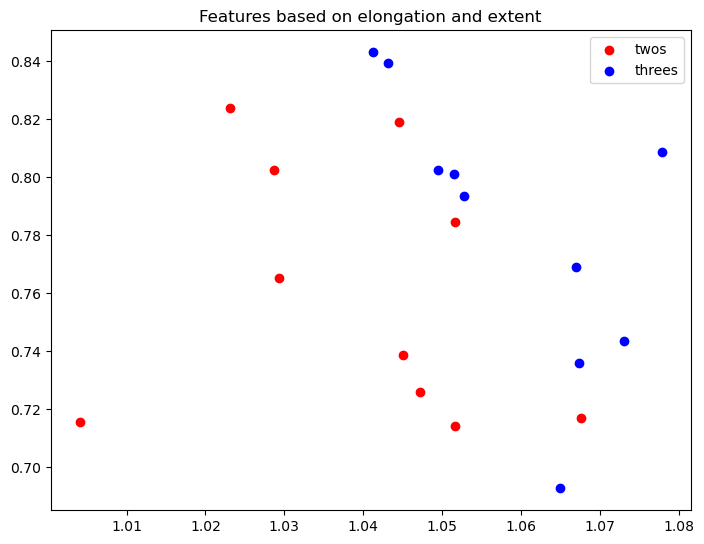

In [26]:
twos_extent = [region[0].extent for region in twos_region]
threes_extent = [region[0].extent for region in threes_region]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_elongation, twos_extent, color='r', label='twos')
ax.scatter(threes_elongation, threes_extent, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on elongation and extent")
plt.show()


#### Discussion

We see here a better separation between the twos and the threes. It is nonetheless still hard so find a clear separation between our classes. We think this is because of the similarity in roundness and size of the digit we are trying to 'classify'. We also believe that using fourier descriptors in this instance would yield a better result.

We also think that the dataset we have is too small for us to determine the real efficiency of the region-based method. Indeed, we might fear that adding additional samples to the clustering would reduce the distance between samples of different classes. Having this small of a dataset may indicate that our method and the separation we found was partly 'out of luck'.